In [2]:
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerBase
import numpy as np

In [3]:
size = 14
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=size)
plt.rc('ytick', labelsize=size)
plt.rc('axes', labelsize=size)
plt.rc('legend', fontsize=size-2)
plt.rc('legend', handlelength=2)
plt.rc('font', size=size)
plt.rc('lines', markersize=8)
plt.rcParams['figure.dpi'] = 100

linestyles = ["-", ":", "-.", "--", (0, (3, 1, 1, 1, 1, 1)), "-", "--", "-.", ":"]
colors = ['#e4bf44', '#c65742', '#9ad0bb', '#87584E', '#aba18d', '#332737', '#e4bf44', '#c65742', '#9ad0bb', '#aba18d', '#332737']
markers = ["o", "v", "s", "d", "X", "p", "*", "o", "v", "s", "d", "*"]

In [4]:
savename = "data/"
exact_ens = np.load(savename + "exact_energies.npy")
mps_rel_ens = np.load(savename + "mps_rel_energies.npy")
jastrow_final_ens = np.load(savename + "jastrow_final_energies.npy")
jastrow_N4_ens = np.load(savename + "jastrow_N4_energy_learningcurve.npy")
pqc_N4_ens = np.load(savename + "pqc_N4_energy_learningcurve.npy")

jastrow_rel_ens, pqc2_rel_ens, pqc2_errs = [], [], []
Ns = [2,4,6,8]
for N in Ns:
    jastrow_rel_ens.append(np.load(savename + f"jastrow_rel_energies_N{N}.npy"))
    pqc2_rel_ens.append(np.load(savename + f"pqc2_rel_energies_N{N}.npy"))
    pqc2_errs.append(np.load(savename + f"pqc2_errs_N{N}.npy"))

pqc1_rel_ens = np.load(savename + "pqc1_rel_energies.npy")
pqc1_errs = np.load(savename + "pqc1_errs.npy")
hybrid_rel_en = np.load(savename + "hybrid_rel_energies.npy")
hybrid_errs = np.load(savename + "hybrid_errs.npy")

pqc2_N4_rel_ens = np.load(savename + "pqc2_N4_rel_energies_encodingrange.npy")
pqc2_N4_errs = np.load(savename + "pqc2_N4_errs_encodingrange.npy")

hybrid_rel_en_shots = np.load(savename + "hybrid_N4_rel_energies_shots.npy")
hybrid_errs_shots = np.load(savename + "hybrid_N4_errs_shots.npy")

layers = [1,2,4,6,8,10]

# Fig. 3

Text(-0.15, -0.1, '(c)')

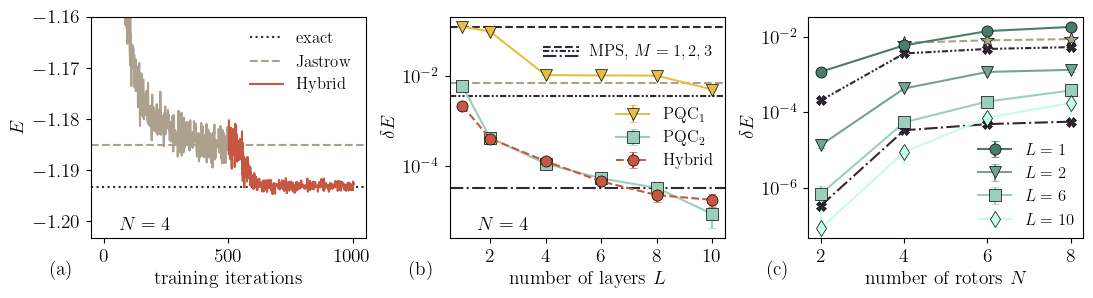

In [5]:
fig = plt.figure(figsize =(6.4*2, 4.8*0.6))

colspan = 4
rowspan = 5
nr,nc = rowspan, 3*colspan +2

plt11 = plt.subplot2grid((nr,nc), (0, 0), rowspan=rowspan, colspan=colspan) 
plt12 = plt.subplot2grid((nr,nc), (0, colspan+1), rowspan=rowspan, colspan=colspan) 
plt13 = plt.subplot2grid((nr,nc), (0, 2*(colspan)+2), rowspan=rowspan, colspan=colspan) 

ax  = [plt11, plt12, plt13]

##############################################
# Subplot (a)
##############################################
i=0
ax[i].axhline(y=exact_ens[1], label=r"exact", color=colors[-1], linestyle=':')
ax[i].axhline(y=jastrow_final_ens[0], label=r"Jastrow", color=colors[-2], linestyle='--')


n1 = len(jastrow_N4_ens)
n2 = len(pqc_N4_ens)
x1 = np.linspace(1, n1, n1)
x2 = np.linspace(n1+1, n1+1+n2, n2)

ax[i].plot(x1, jastrow_N4_ens, color=colors[-2])
ax[i].plot(x2, pqc_N4_ens, label=r"Hybrid", color=colors[1])

ax[i].set_xlabel("training iterations")
ax[i].set_ylabel(r"$E$")
ax[i].set_ylim(exact_ens[1]-0.01, -1.16)
ax[i].legend(frameon=False)
ax[i].text(0.1, 0.1, f"$N = 4$", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')
ax[i].text(-0.15, -0.1, "(a)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

##############################################
# Subplot (b)
##############################################
n=1
i=1
ax[i].axhline(y=jastrow_rel_ens[n][3,2], color=colors[-2], linestyle='--')
ax[i].axhline(y=mps_rel_ens[n][0], color=colors[-1], linestyle='--')
ax[i].axhline(y=mps_rel_ens[n][1], color=colors[-1], linestyle=(0, (3, 1, 1, 1, 1, 1)))
ax[i].axhline(y=mps_rel_ens[n][2], color=colors[-1], linestyle='-.')

j = 0
ax[i].errorbar(layers, pqc1_rel_ens[:,j], yerr=pqc1_errs[:,j]/np.abs(exact_ens[n]), label=r"PQC$_1$", color=colors[0], linestyle="-", marker=markers[1], markeredgecolor="black", markeredgewidth=0.5, capsize=3)
ax[i].errorbar(layers, pqc2_rel_ens[n][:,j], yerr=pqc2_errs[n][:,j]/np.abs(exact_ens[n]), label=r"PQC$_2$", color=colors[2], linestyle="-", marker=markers[2], markeredgecolor="black", markeredgewidth=0.5, capsize=3)
ax[i].errorbar(layers, hybrid_rel_en[:,j], yerr=hybrid_errs[:,j]/np.abs(exact_ens[n]), label=f"Hybrid", color=colors[1], linestyle="--", marker=markers[0], markeredgecolor="black", markeredgewidth=0.5, capsize=3)

ax[i].set_xlabel("number of layers $L$")
ax[i].set_ylabel(r"$\delta E$")
ax[i].set_yscale("log")
legend1 = ax[i].legend(frameon=False, loc='center right', bbox_to_anchor=(1.01, 0.45))
ax[i].xaxis.set_ticks([2,4,6,8,10])

class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width*1.1], [0.82*height,0.82*height], linestyle='--', color=colors[-1])
        l2 = plt.Line2D([x0,y0+width*1.1], [0.5*height,0.5*height], linestyle=(0, (3, 1, 1, 1, 1, 1)), color=colors[-1])
        l3 = plt.Line2D([x0,y0+width*1.1], [0.08*height,0.08*height], linestyle='-.', color=colors[-1])
        return [l1, l2, l3]
    

ax[i].legend([("r","-")], ['MPS, $M=1,2,3$'],
           handler_map={tuple: AnyObjectHandler()}, frameon=False, fontsize=size-2, loc='upper right', bbox_to_anchor=(1.01, 0.94))
ax[i].add_artist(legend1)
ax[i].text(0.1, 0.1, f"$N = 4$", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')
ax[i].text(-0.15, -0.1, "(b)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')


##############################################
# Subplot (c)
##############################################
i=2
colors = ['#e4bf44', '#c65742', '#9ad0bb', '#332737', '#aba18d', '#332737', '#e4bf44', '#c65742', '#9ad0bb', '#aba18d', '#332737']
colors2 = ['#497c6a', '#71a591', '#9ad0bb', '#c5fde7']
j=0
ax[i].plot(Ns[1:], [jastrow_rel_ens[n].reshape((7,-1))[3,-1] for n,N in enumerate(Ns)][1:], color=colors[-2], linestyle="--", marker=markers[-1], markersize=10, markeredgecolor="black", markeredgewidth=0.5)

for l, layer in enumerate(layers):
    if layer in [1,2,6,10]:
        ax[i].errorbar(Ns, [pqc2_rel_ens[n].reshape((6,-1))[l,0] for n,N in enumerate(Ns)], yerr=[pqc2_errs[n].reshape((6,-1))[l,0]/np.abs(exact_ens[n]) for n,N in enumerate(Ns)], label=r"$L=%s$" %layer, color=colors2[j], linestyle=linestyles[0], marker=markers[j], markeredgecolor="black", markeredgewidth=0.5, capsize=3)
        j += 1

ax[i].plot(Ns, mps_rel_ens[:,1], color=colors[-1], linestyle=(0, (3, 1, 1, 1, 1, 1)), marker="X", markersize=7, markeredgecolor="black", markeredgewidth=0.5)
ax[i].plot(Ns, mps_rel_ens[:,2], color=colors[-1], linestyle="-.", marker="X", markersize=7, markeredgecolor="black", markeredgewidth=0.5)

ax[i].set_xlabel(r"number of rotors $N$")
ax[i].set_ylabel(r"$\delta E$")
ax[i].xaxis.set_ticks(Ns)
ax[i].set_yscale("log")
ax[i].legend(frameon=False, loc='lower right', bbox_to_anchor=(1.02, -0.02))
ax[i].text(-0.15, -0.1, "(c)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

# plt.savefig(f'_rotor1.png', dpi=300,bbox_inches='tight')
# plt.savefig(f'_rotor1.pdf', dpi=300,bbox_inches='tight')

# Fig. 4

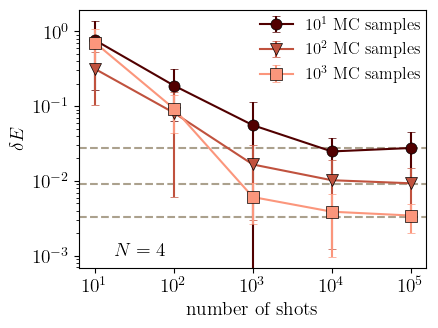

In [6]:
colors2 = ['#510000', '#c0523e', '#fb967c']

n_samples = [100, 1000, 10000]
shots = [None,10,100,1000,10000,100000]

fig, ax0 = plt.subplots(1,1, figsize=(6.4*2*0.35, 4.8*0.7))

for j, samples in enumerate(n_samples[:]):
    ax0.axhline(y=hybrid_rel_en_shots[j,0], color=colors[-2], linestyle='--')

legend_samples = [r"$10^1$", r"$10^2$", r"$10^3$", r"$10^4$"]
for j, samples in enumerate(n_samples[:]):
    ax0.errorbar(shots[1:], hybrid_rel_en_shots[j,1:], yerr=hybrid_errs_shots[j,1:], label=f"%s MC samples" %legend_samples[j], color=colors2[j], linestyle="-", marker=markers[j], markeredgecolor="black", markeredgewidth=0.5, capsize=3)

ax0.set_xlabel("number of shots")
ax0.set_ylabel(r"$\delta E$")
ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.xaxis.set_ticks([10, 100, 1000, 10000, 100000])
ax0.text(0.1, 0.1, f"$N = 4$", transform=ax0.transAxes, fontsize=size, verticalalignment='top')
ax0.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.03, 1.03))

# plt.savefig(f'_rotor22.png', dpi=300,bbox_inches='tight')
# plt.savefig(f'_rotor22.pdf', dpi=300,bbox_inches='tight')

# Fig. 8

Text(-0.2, 1.0, '(b)')

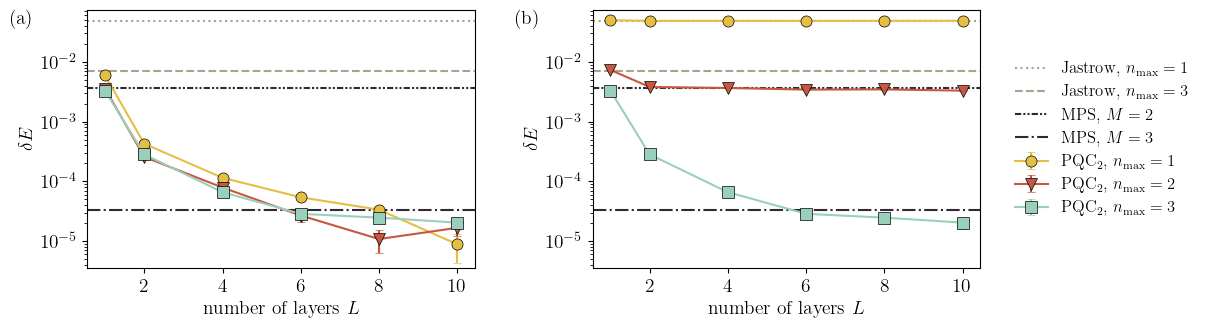

In [7]:
fig = plt.figure(figsize =(6.4*1.8, 4.8*0.7))

colspan = 4
rowspan = 5
nr,nc = rowspan, 2*colspan +1

plt11 = plt.subplot2grid((nr,nc), (0, 0), rowspan=rowspan, colspan=colspan) 
plt12 = plt.subplot2grid((nr,nc), (0, colspan+1), rowspan=rowspan, colspan=colspan) 

ax  = [plt11, plt12]
##############################################
# Subplot (a)
##############################################
i=0
ax[i].axhline(y=jastrow_rel_ens[n][3,0], label=r"Jastrow, $n_{\mathrm{max}}= 1$", color=colors[-2], linestyle=':')
ax[i].axhline(y=jastrow_rel_ens[n][3,2], label=r"Jastrow, $n_{\mathrm{max}}= 3$", color=colors[-2], linestyle='--')
ax[i].axhline(y=mps_rel_ens[n][1], label=r"MPS, $M=2$", color=colors[-1], linestyle=(0, (3, 1, 1, 1, 1, 1)))
ax[i].axhline(y=mps_rel_ens[n][2], label=r"MPS, $M=3$", color=colors[-1], linestyle='-.')

for j in range(3):
    ax[i].errorbar(layers, pqc2_rel_ens[n][:,j], yerr=pqc2_errs[n][:,j]/np.abs(exact_ens[n]), label=r"PQC$_2$, $n_{\mathrm{max}}= %s$" %(j+1), color=colors[j], linestyle="-", marker=markers[j], markeredgecolor="black", markeredgewidth=0.5, capsize=3)

ax[i].set_xlabel(r"number of layers $L$")
ax[i].set_ylabel(r"$\delta E$")
ax[i].set_yscale("log")
ax[i].set_ylim(3.5e-6, 7.5e-2)
ax[i].text(-0.2, 1.0, "(a)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

##############################################
# Subplot (b)
##############################################
i=1
ax[i].axhline(y=jastrow_rel_ens[n][3,0], label=r"Jastrow, $n_{\mathrm{max}}= 1$", color=colors[-2], linestyle=':')
ax[i].axhline(y=jastrow_rel_ens[n][3,2], label=r"Jastrow, $n_{\mathrm{max}}= 3$", color=colors[-2], linestyle='--')
ax[i].axhline(y=mps_rel_ens[n][1], label=r"MPS, $M=2$", color=colors[-1], linestyle=(0, (3, 1, 1, 1, 1, 1)))
ax[i].axhline(y=mps_rel_ens[n][2], label=r"MPS, $M=3$", color=colors[-1], linestyle='-.')

for j in range(3):
    ax[i].errorbar(layers, pqc2_N4_rel_ens[:,j], yerr=pqc2_N4_errs[:,j]/np.abs(exact_ens[n]), label=r"PQC$_2$, $n_{\mathrm{max}}= %s$" %(j+1), color=colors[j], linestyle="-", marker=markers[j], markeredgecolor="black", markeredgewidth=0.5, capsize=3)

ax[i].set_xlabel(r"number of layers $L$")
ax[i].set_ylabel(r"$\delta E$")
ax[i].set_yscale("log")
ax[i].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
ax[i].set_ylim(3.5e-6, 7.5e-2)
ax[i].text(-0.2, 1.0, "(b)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

# plt.savefig(f'_rotor_appendix.png', dpi=300,bbox_inches='tight')
# plt.savefig(f'_rotor_appendix.pdf', dpi=300,bbox_inches='tight')

# Fig. 7

Text(-0.2, 1.0, '(b)')

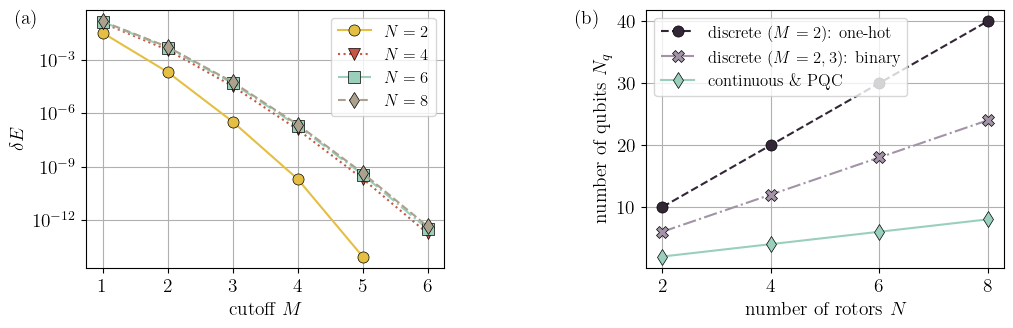

In [8]:
colors = ['#e4bf44', '#c65742', '#9ad0bb', '#aba18d', '#332737', '#e4bf44', '#c65742', '#9ad0bb', '#aba18d', '#332737']

fig = plt.figure(figsize =(6.4*1.85, 4.8*0.7))

colspan = 4
rowspan = 5
nr,nc = rowspan, 2*colspan +2

plt11 = plt.subplot2grid((nr,nc), (0, 0), rowspan=rowspan, colspan=colspan) 
plt12 = plt.subplot2grid((nr,nc), (0, colspan+2), rowspan=rowspan, colspan=colspan) 

ax  = [plt11, plt12]
##############################################
# Subplot (a)
##############################################
i=0
x = np.arange(len(mps_rel_ens[0,:]))+1
for j,N in enumerate(Ns):
    if N == 2:
        ax[i].plot(x[:-1], mps_rel_ens[j,:-1], label=r"$N=%s$" %N, color=colors[j], linestyle=linestyles[j], marker=markers[j], markeredgecolor="black", markeredgewidth=0.5)
    else:
        ax[i].plot(x, mps_rel_ens[j,:], label=r"$N=%s$" %N, color=colors[j], linestyle=linestyles[j], marker=markers[j], markeredgecolor="black", markeredgewidth=0.5)
ax[i].set_xlabel(r"cutoff $M$")
ax[i].set_ylabel(r"$\delta E$")
ax[i].set_yscale("log")
ax[i].grid()
ax[i].legend()
ax[i].xaxis.set_ticks(np.arange(1,7))
ax[i].text(-0.2, 1.0, "(a)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

##############################################
# Subplot (b)
##############################################
i=1
Ns = np.array([2,4,6,8])

one_hot2 = 2*2+1
binary2 = np.ceil(np.log2(one_hot2))

colors3 = ['#332737', '#a293a6']

ax[i].plot(Ns, one_hot2*Ns, color=colors3[0], linestyle=linestyles[3], marker=markers[0], markeredgecolor="black", markeredgewidth=0.5, label=r'discrete ($M=2$): one-hot')
ax[i].plot(Ns, binary2*Ns, color=colors3[1], linestyle=linestyles[2], marker="X", markeredgecolor="black", markeredgewidth=0.5, label=r'discrete ($M=2,3$): binary')
ax[i].plot(Ns, Ns, color=colors[2], linestyle=linestyles[0], marker=markers[3], markeredgecolor="black", markeredgewidth=0.5, label=r'continuous \& PQC')

ax[i].set_xlabel(r'number of rotors $N$')
ax[i].set_ylabel(r'number of qubits $N_q$')
ax[i].grid()
ax[i].xaxis.set_ticks(Ns)
ax[i].legend()
ax[i].text(-0.2, 1.0, "(b)", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

# plt.savefig(f'_mps.png', dpi=300,bbox_inches='tight')
# plt.savefig(f'_mps.pdf', dpi=300,bbox_inches='tight')